# This Lab is open from 6 am Tuesday 9/8 to 11:59 pm on Friday 9/11

This Lab explores ways to calculate basic statistics, measure of spread and making a box plot for numeric variables in the data called grbooks.csv. This is a data frame with authors, book names and ratings etc. Please make sure to create a folder called Lab 3 in your DS 201 folder and save this ipynb file together with grbooks data. That way all of your solutions are separated from your other ipynb files and it  will be easier to find the solution when it is time to submit.


Let's start by importing all the necessory packages and the data

In [42]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as mpt
import seaborn as sbn
cols=['author_name','book_title', 'book_average_rating', 'num_ratings', 'num_reviews',
        'score']
int_cols=['book_average_rating', 'num_ratings', 'num_reviews',
        'score']

### Problem 1 (10 points)
After you upload the data, find the standard deviation, and mean absolute deviation(MAD) of 4 numerical variables listed in the previous cell. Find the variables with the lowest and highest standard deviation among these 6 variables. Do the same for MAD.  Comment on what it means for these variables to have the lowest $\sigma$, highest $\sigma$, lowest MAD, and highest MAD. 

In [43]:
df=pd.read_csv("grbooks.csv")
df.head(4)

,author_average_rating,author_gender,author_genres,author_id,author_name,author_page_url,author_rating_count,author_review_count,birthplace,book_average_rating,book_fullurl,book_id,book_title,genre_1,genre_2,num_ratings,num_reviews,pages,publish_date,score
0,4.01,female,"historical-fiction,",74489,Victoria Thompson\n,/author/show/74489.Victoria_Thompson,74399,6268,United States\n,4.02,https://www.goodreads.com/book/show/686717.Mur...,686717,\n Murder on St. Mark's Place\n,Mystery,Historical,5260,375,277,2000,3230
1,4.15,male,"literature-fiction,mystery-thrillers,",706255,Stieg Larsson\n,/author/show/706255.Stieg_Larsson,3726435,142704,Sweden\n,4.13,https://www.goodreads.com/book/show/2429135.Th...,2429135,\n The Girl with the Dragon Tattoo\n,Fiction,Mystery,2229163,65227,465,August 2005,3062
2,4.00,female,"romance,",5618190,Mimi Jean Pamfiloff\n,/author/show/5618190.Mimi_Jean_Pamfiloff,76496,7975,United States\n,3.99,https://www.goodreads.com/book/show/27833684-t...,27833684,\n Tailored for Trouble\n,Romance,Contemporary,2151,391,354,2016,4585
3,3.88,male,"fiction,memoir,",37871,José Donoso\n,/author/show/37871.Jos_Donoso,5522,489,Chile\n,4.14,https://www.goodreads.com/book/show/382975.The...,382975,\n The Obscene Bird of Night\n,Fiction,Magical Realism,1844,173,438,1970,1533


In [44]:
df.shape

(22891, 20)

In [45]:
df.dtypes

author_average_rating    float64
author_gender             object
author_genres             object
author_id                  int64
author_name               object
author_page_url           object
author_rating_count        int64
author_review_count        int64
birthplace                object
book_average_rating      float64
book_fullurl              object
book_id                   object
book_title                object
genre_1                   object
genre_2                   object
num_ratings                int64
num_reviews                int64
pages                     object
publish_date              object
score                      int64
dtype: object

In [46]:
newdf=df[cols]

In [47]:
newdf.head(4)

,author_name,book_title,book_average_rating,num_ratings,num_reviews,score
0,Victoria Thompson\n,\n Murder on St. Mark's Place\n,4.02,5260,375,3230
1,Stieg Larsson\n,\n The Girl with the Dragon Tattoo\n,4.13,2229163,65227,3062
2,Mimi Jean Pamfiloff\n,\n Tailored for Trouble\n,3.99,2151,391,4585
3,José Donoso\n,\n The Obscene Bird of Night\n,4.14,1844,173,1533


In [48]:
newdf.std()

book_average_rating         0.291317
num_ratings            180069.814253
num_reviews              6837.503574
score                   11022.018268
dtype: float64

#### In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation(book_average_rating) indicates that the values tend to be close to the mean of the set, while a high standard deviation(num_ratings) indicates that the values are spread out over a wider range.

In [49]:
newdf.mad()

book_average_rating        0.225215
num_ratings            66577.853866
num_reviews             3016.061533
score                   3721.948295
dtype: float64

#### The mean absolute deviation of a dataset is the average distance between each data point and the mean. Therefore the value with the least MAD(book_average_rating) is closest to the mean, while the Value with the maximum MAD (num_ratings)is farthest from the mean

### Problem 2 ( 10 points)
Find the first quartile  (Q1), second quartile (Q2 = Median), and the third quartile(Q3) of the four numerical columns. Which variables have the lowest and highest interquartile range (IQR)? You can use the Quantile function in pandas to find these. More about quantile function is here.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html and here 
https://stats.stackexchange.com/questions/156778/percentile-vs-quantile-vs-quartile

In [50]:
Q1 = newdf.quantile(0.25)
Q1


book_average_rating      3.77
num_ratings            820.00
num_reviews            106.00
score                  832.00
Name: 0.25, dtype: float64

In [51]:
Q3 = newdf.quantile(0.75)
Q3

book_average_rating        4.14
num_ratings            20143.00
num_reviews             1504.00
score                   3597.50
Name: 0.75, dtype: float64

In [52]:
Q2=newdf.median()
Q2

book_average_rating       3.96
num_ratings            4403.00
num_reviews             384.00
score                  1727.00
dtype: float64

In [53]:
IQR = Q3 - Q1
IQR

book_average_rating        0.37
num_ratings            19323.00
num_reviews             1398.00
score                   2765.50
dtype: float64

#### The variable book_average_rating has lowest IQR while the variable num_ratings has highest IQR

### Problem 3 ( 10 points)
Find the range of all 4 numerical columns. Range, by definition, is maximum minus the minimum for each variable. Using the range as a measure of spread, which variable data is ideal (symmetric), and which variable is most skewed?

In [54]:
newdf.describe()

,book_average_rating,num_ratings,num_reviews,score
count,22891.000000,2.289100e+04,22891.000000,22891.000000
mean,3.951456,4.668349e+04,2324.754794,3893.028483
std,0.291317,1.800698e+05,6837.503574,11022.018268
min,0.000000,0.000000e+00,0.000000,55.000000
25%,3.770000,8.200000e+02,106.000000,832.000000
50%,3.960000,4.403000e+03,384.000000,1727.000000
75%,4.140000,2.014300e+04,1504.000000,3597.500000
max,5.000000,3.820921e+06,147696.000000,598270.000000


In [59]:
bookmax = newdf['book_average_rating' ].max()
bookmin=newdf['book_average_rating' ].min()
bookrange=bookmax-bookmin
bookrange

5.0

In [63]:
newdf['book_average_rating'].median()

3.96

In [64]:
newdf['book_average_rating'].mean()

3.951456030754456

#### Since mean is approximately equal to median in this variable data, therefore the variable data is symmetric

In [65]:
ratingsmax = newdf['num_ratings' ].max()
ratingsmin=newdf['num_ratings' ].min()
ratingsrange=ratingsmax-ratingsmin
ratingsrange

3820921

In [66]:
newdf['num_ratings'].median()

4403.0

In [67]:
newdf['num_ratings'].mean()

46683.48778996112

#### As mean>median for this variable's data, therefore this variable data is skewed towards the right

In [61]:
reviewsmax = newdf['num_reviews' ].max()
reviewsmin=newdf['num_reviews' ].min()
reviewsrange=reviewsmax-reviewsmin
reviewsrange

147696

In [68]:
newdf['num_reviews'].median()

384.0

In [69]:
newdf['num_reviews'].mean()

2324.754794460705

#### As mean>median for this variable's data, therefore this variable data is skewed towards the right

In [62]:
scoremax = newdf['score' ].max()
scoremin=newdf['score' ].min()
scorerange=scoremax-scoremin
scorerange

598215

In [71]:
newdf['score'].median()

1727.0

In [70]:
newdf['score'].mean()

3893.028482809838

#### As mean>median for this variable's data, therefore this variable data is skewed towards the right

### Problem 4 ( 10 points)
We will find outliers in our data on this problem. For any variable, if any data falls below
the number $ Q1- 1.5 IQR$ or falls above the number $ Q3+ 1.5 IQR$ then those data points are outliers. Note that $IQR = Q3 - Q1$. Find how many outliers doeas each numerical variables have?

In [73]:
newdf[(newdf<Q1-1.5*IQR)|(newdf>Q3+1.5*IQR)].count()

author_name               0
book_title                0
book_average_rating     423
num_ratings            3516
num_reviews            3086
score                  2351
dtype: int64

### Problem 5 (10 points)

Create a box plot for all 4 numerical variables.

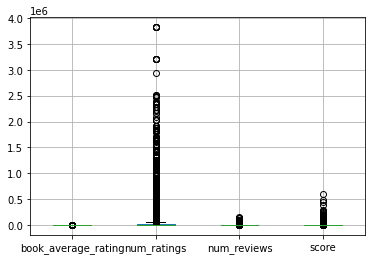

In [74]:
boxplot = df.boxplot(column=['book_average_rating', 'num_ratings', 'num_reviews','score'])